<a href="https://colab.research.google.com/github/TheZombie272/Lithofacies-Classification-ML/blob/main/Lithofacies_Classification_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Algoritmo KNN
from sklearn.neighbors import KNeighborsClassifier

# Manejo de archivos Pandas
import pandas as pd

# Manejo de matrices
import numpy as np

# División de los datos en entrenamiento y testing
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import model_selection

# Metricas bonitas
from yellowbrick.classifier import confusion_matrix as  cm
from yellowbrick.classifier import classification_report as cr
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import class_prediction_error

# Herramientas
## Encoder, paso de variables categóricas a numéricas
from sklearn.preprocessing import LabelEncoder
## Para preprocesar las features
from sklearn import preprocessing

#Balance de clases
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import SMOTEN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import NearMiss

# Visualización y gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# PCA
from sklearn.decomposition import PCA



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Facies Classification Challenge (Kaggle)

El dataset que planeo utilizar es el Facies Classification Challenge (Kaggle), principalmente por las siguientes razones:

1. Tiene un respaldo académico sólido y ha sido ampliamente referenciado en publicaciones científicas.

2. Sus variables están bien alineadas con las utilizadas en los modelos del artículo (SVM, LDA, etc.).

3. Es un conjunto de datos limpio y estructurado, que incluye campos relevantes como Formation, Well Name, Depth, GR, PE, NPHI, entre otros.

4. El dataset del artículo tiene 3243 entradas, un número muy cercano a las del usado en el paper.

Soy consciente de que el profesor indicó un dataset específico para el trabajo. Sin embargo, dado que este no corresponde exactamente al utilizado en el artículo de referencia, considero que el dataset de Kaggle representa una alternativa válida y pertinente para aplicar los conceptos vistos.


Link al dataset: https://github.com/imtej/Lithofacies-Classification-using-ML-Techniques/blob/main/facies_data.csv

In [ ]:
path_sampledata = "/content/drive/MyDrive/Universidad/MachingLearning/Tarea1/data.csv"
data = pd.read_csv(path_sampledata)

In [ ]:
data

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
3227,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
3228,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
3229,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
3230,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


## Variables que están en el artículo pero no en mi dataset

| Variable      | Descripción                  | ¿Importancia?                                |
| ------------- | ---------------------------- | -------------------------------------------- |
| `CAL`         | Caliper log                  | Moderada (puede indicar cavidades, washouts) |
| `DT`          | Sonic porosity (travel time) | Alta en modelos físicos                      |
| `RHOB`        | Bulk density                 | Alta para PHI estimada                       |
| `LLS`, `MSFL` | Resistividades adicionales   | Pueden ayudar, pero menos críticas           |
| `LLD`         | Similar a tu `ILD_log10`     | Casi equivalente                             |


## Análisis exploratorio de datos

In [ ]:
# Ver las primeras filas
data.head()

print("---------------------------------------------")
print()
# Ver información general
data.info()

print("---------------------------------------------")
# Estadísticas descriptivas
data.describe()


---------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     3232 non-null   int64  
 1   Formation  3232 non-null   object 
 2   Well Name  3232 non-null   object 
 3   Depth      3232 non-null   float64
 4   GR         3232 non-null   float64
 5   ILD_log10  3232 non-null   float64
 6   DeltaPHI   3232 non-null   float64
 7   PHIND      3232 non-null   float64
 8   PE         3232 non-null   float64
 9   NM_M       3232 non-null   int64  
 10  RELPOS     3232 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 277.9+ KB
---------------------------------------------


,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,2.504243,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,4.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,6.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


Frecuencia de clases

/tmp/ipython-input-9-1384641943.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Facies', palette="tab10")


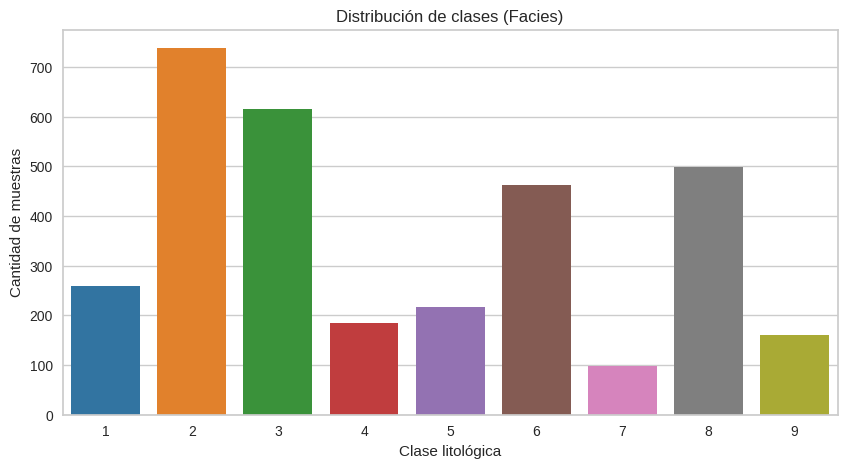

In [ ]:
# Conteo de muestras por clase
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='Facies', palette="tab10")
plt.title("Distribución de clases (Facies)")
plt.xlabel("Clase litológica")
plt.ylabel("Cantidad de muestras")
plt.show()


* Se evidencia un desequilibrio de clases drastico, donde clases como las 7, 9 y 4 son minorías.

acá se tendrá que usar una técnica para abordar este problema

Correlación entre las variables numéricas

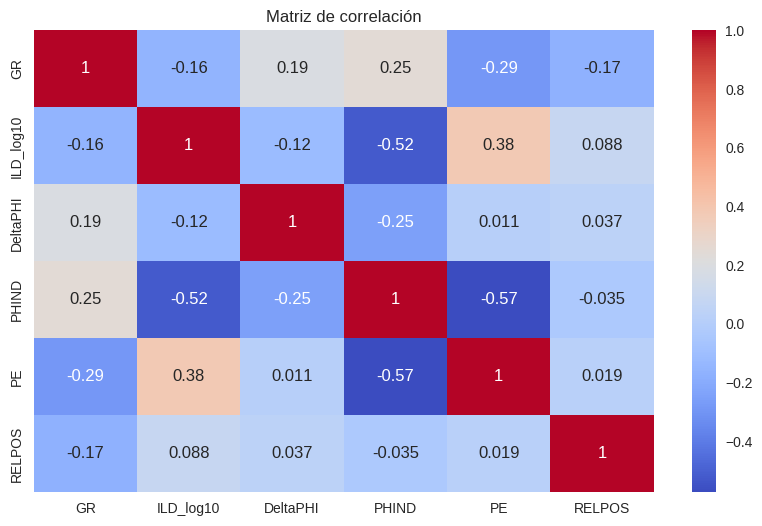

In [ ]:
# Solo variables numéricas útiles
numerical_cols = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'RELPOS']

plt.figure(figsize=(10,6))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()


Solo hay dos relaciones relativamente altas, sin embargo, no son sifnificativamente altas.

Que me dice esto:

1. Ninguna variable está completamente correlacionada con otra, por lo que no debería eliminar ninguna aún.

2. Algunas combinaciones (PHIND, PE, ILD_log10) pueden ser buenas features conjuntas para separación de clases.

3. RELPOS tiene baja correlación con todas, lo que significa que podría aportar algo espacial/estratigráfico diferente

/tmp/ipython-input-11-3996414575.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Facies', y='PHIND', palette='Set3')


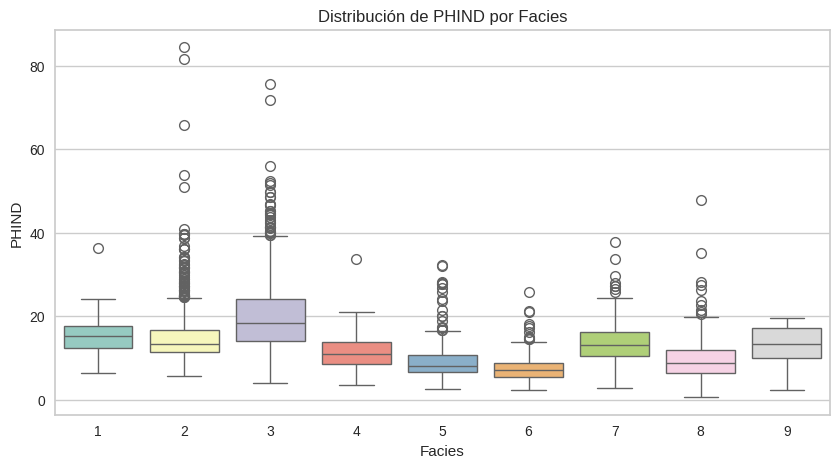

/tmp/ipython-input-11-3996414575.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Facies', y='PE', palette='Set3')


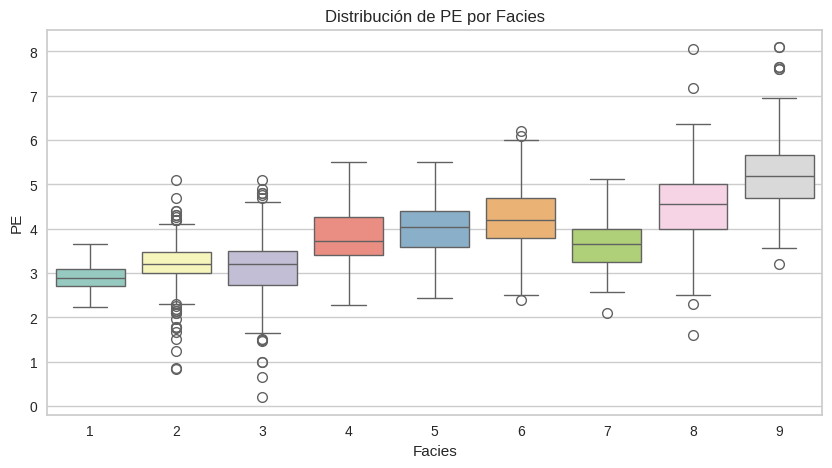

/tmp/ipython-input-11-3996414575.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Facies', y='ILD_log10', palette='Set3')


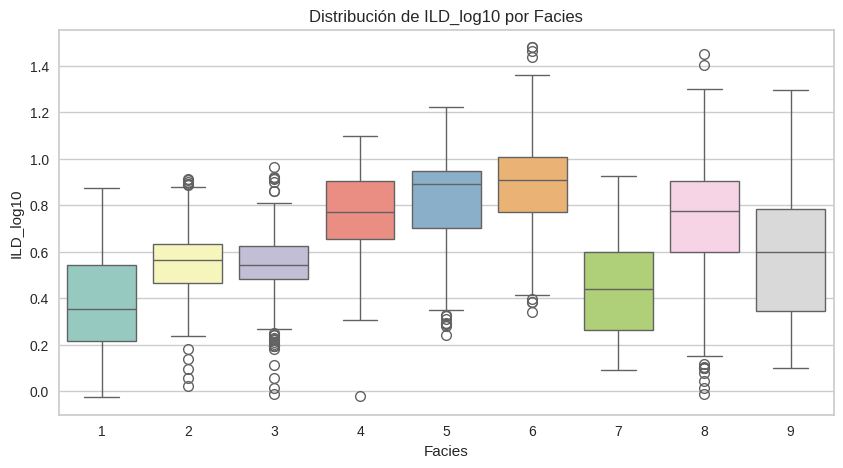

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='Facies', y='PHIND', palette='Set3')
plt.title("Distribución de PHIND por Facies")
plt.xlabel("Facies")
plt.ylabel("PHIND")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='Facies', y='PE', palette='Set3')
plt.title("Distribución de PE por Facies")
plt.xlabel("Facies")
plt.ylabel("PE")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='Facies', y='ILD_log10', palette='Set3')
plt.title("Distribución de ILD_log10 por Facies")
plt.xlabel("Facies")
plt.ylabel("ILD_log10")
plt.show()



* Esto sugiere que ILD_log10 puede ayudar a distinguir facies como 5 y 6 del resto.

* Este patrón indica que PE es una de las variables más discriminantes entre facies.

* PHIND (porosidad estimada) tiene alto solapamiento.


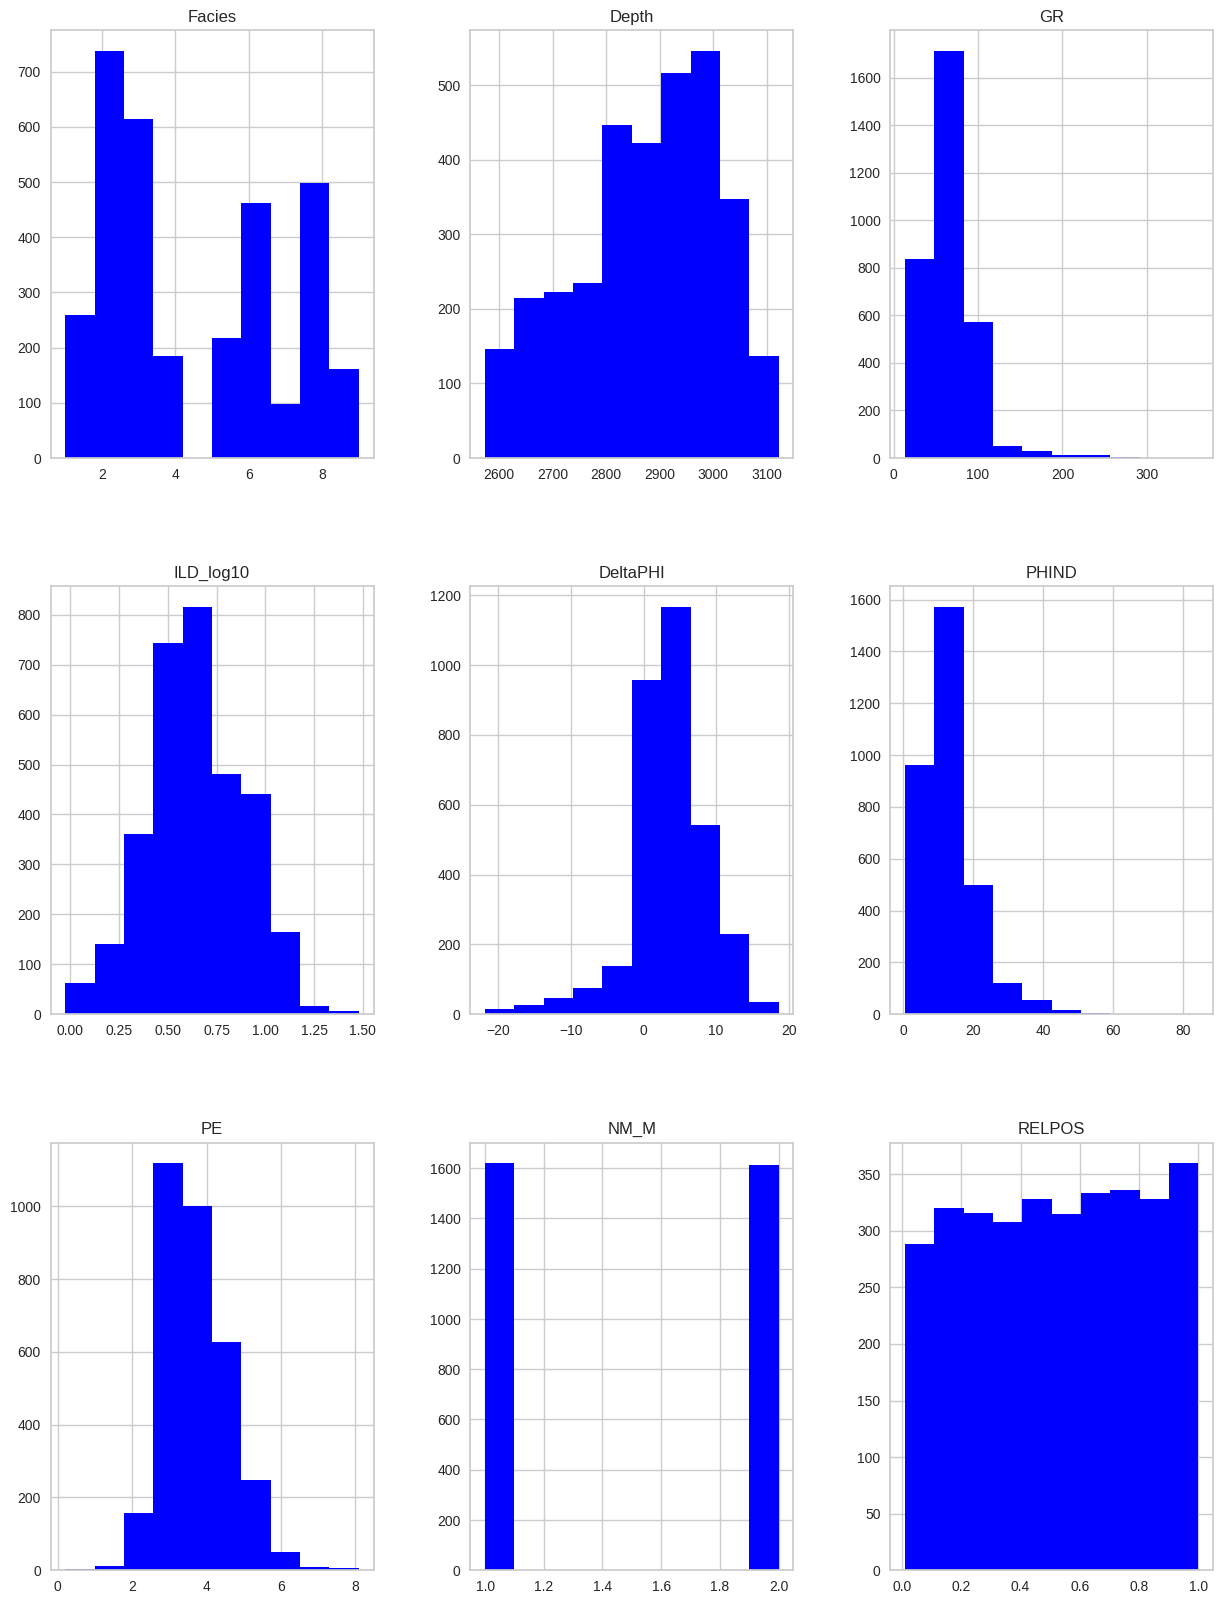

In [ ]:
# Histograma de cada feature, para ver las distribuciones en cada feature y detectar alguna anómala o con pocos datos fuera de rango o incluso features nulas
data.hist(figsize = (15,20), color='blue')
plt.show()

# Preprocesamiento de datos

desbalance de clases, solución

<Axes: xlabel='Facies'>

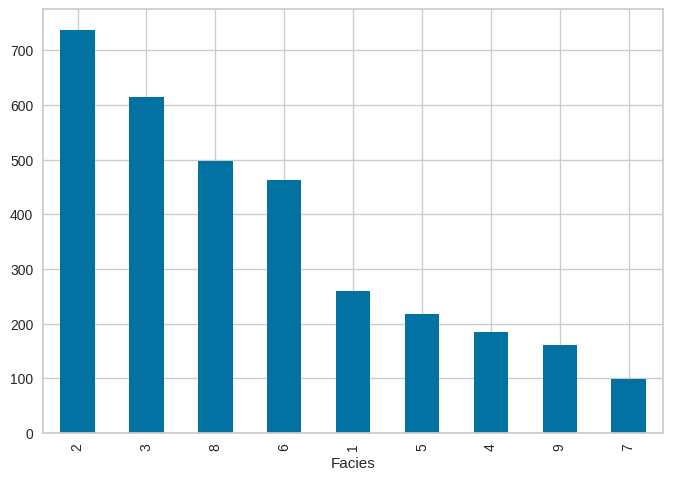

In [ ]:
data['Facies'].value_counts().plot(kind='bar')


In [ ]:
X = data.drop(columns=['Facies', 'Well Name', 'NM_M', 'Formation'])
print(X.columns)
y = data['Facies']


Index(['Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'RELPOS'], dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


dividir en test y train

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



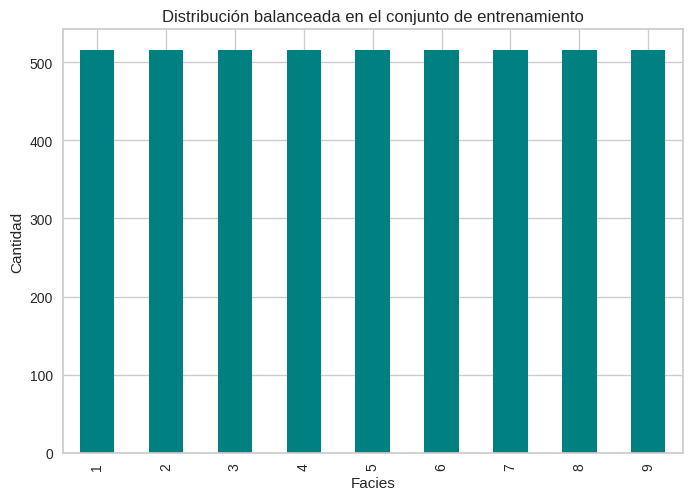

In [ ]:

pd.Series(y_train_resampled).value_counts().sort_index().plot(kind='bar', color='teal')
plt.title("Distribución balanceada en el conjunto de entrenamiento")
plt.xlabel("Facies")
plt.ylabel("Cantidad")
plt.grid(True)
plt.show()


# Método K-Nearest Neighbors (KNN)

importar KNN y entrenar KNN

In [ ]:
# Crear modelo KNN con k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=3)

Predecir sobre le conjunto de prueba

In [ ]:
y_pred = knn.predict(X_test)


Vamos a ver las predicciones

In [ ]:
y_pred

array([3, 8, 1, 2, 2, 7, 8, 2, 2, 4, 7, 6, 4, 8, 3, 6, 9, 4, 2, 3, 2, 3,
       3, 4, 9, 3, 5, 5, 2, 3, 6, 2, 8, 1, 3, 6, 2, 4, 1, 6, 6, 8, 9, 5,
       3, 3, 2, 3, 9, 9, 2, 6, 8, 2, 8, 3, 5, 3, 3, 2, 1, 6, 3, 5, 2, 2,
       8, 2, 7, 1, 6, 2, 8, 8, 3, 8, 8, 5, 8, 4, 4, 9, 8, 6, 5, 5, 4, 2,
       2, 2, 1, 6, 7, 2, 4, 4, 3, 8, 5, 6, 2, 6, 4, 2, 8, 2, 6, 3, 2, 5,
       9, 3, 7, 5, 3, 3, 1, 1, 5, 8, 6, 1, 6, 1, 2, 4, 5, 6, 1, 1, 5, 2,
       6, 3, 7, 3, 2, 6, 6, 2, 4, 8, 3, 3, 1, 1, 4, 2, 2, 8, 8, 5, 5, 5,
       8, 8, 2, 8, 4, 8, 3, 2, 3, 6, 6, 6, 6, 3, 2, 3, 2, 6, 2, 5, 8, 3,
       6, 5, 9, 6, 3, 2, 2, 1, 5, 3, 8, 2, 7, 2, 1, 5, 2, 1, 9, 9, 2, 2,
       2, 2, 6, 8, 7, 5, 2, 3, 6, 4, 6, 1, 9, 4, 4, 2, 6, 3, 2, 4, 3, 2,
       2, 8, 7, 1, 4, 3, 4, 8, 8, 5, 3, 2, 2, 6, 1, 1, 2, 8, 5, 4, 5, 4,
       2, 2, 6, 2, 8, 5, 4, 8, 2, 6, 6, 1, 6, 2, 3, 6, 5, 3, 4, 3, 1, 3,
       5, 3, 2, 2, 3, 2, 5, 2, 1, 2, 2, 9, 5, 1, 4, 4, 4, 6, 3, 2, 1, 8,
       2, 2, 3, 1, 2, 7, 7, 3, 3, 8, 3, 2, 8, 7, 3,

              precision    recall  f1-score   support

           1       0.81      0.88      0.85        78
           2       0.81      0.79      0.80       222
           3       0.81      0.78      0.80       185
           4       0.59      0.75      0.66        55
           5       0.54      0.72      0.62        65
           6       0.77      0.67      0.72       139
           7       0.74      0.86      0.79        29
           8       0.73      0.62      0.67       149
           9       0.87      0.96      0.91        48

    accuracy                           0.76       970
   macro avg       0.74      0.78      0.76       970
weighted avg       0.76      0.76      0.76       970



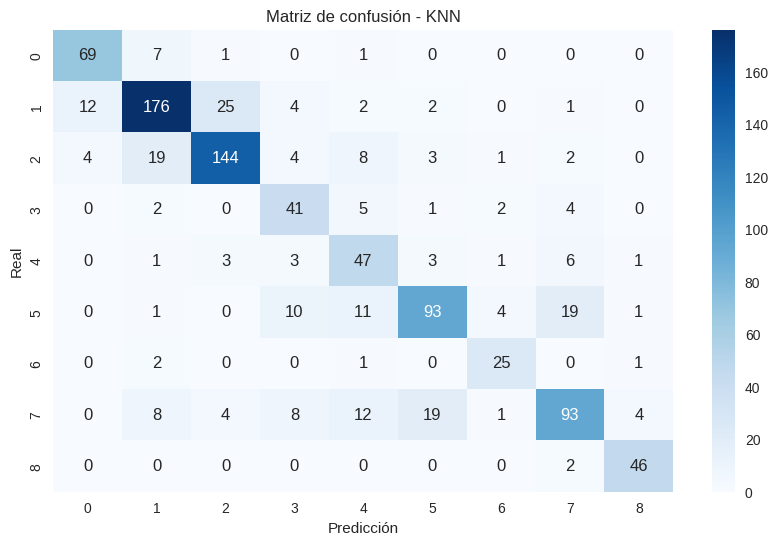

In [ ]:
# Reporte de precisión por clase
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión - KNN")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

### Análisis del resporte con KNN

* 1, 2, 3	~ 0.80–0.85 = Muy buen equilibrio entre precisión y recall. El modelo entiende muy bien estas facies.

* La clase 9 es reportada con claridad, alto f1 score a pesar de ser una minoría.

* 4, 5, 8	~ 0.62–0.67 = No está mal, pero hay margen de mejora. Podría haber solapamiento o menos datos.

# Método XGBOOST


Reindexar para poder usar xgboost

In [ ]:
# Ajustar las etiquetas (de 1–9 a 0–8)
y_train_adj = y_train_resampled - 1
y_test_adj = y_test - 1


In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=9,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

xgb_model.fit(X_train_resampled, y_train_adj)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:50:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=9, num_parallel_tree=None, ...)

Predecir y evaluar

Reporte de clasificación - XGBoost
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        78
           1       0.82      0.83      0.83       222
           2       0.82      0.79      0.81       185
           3       0.74      0.82      0.78        55
           4       0.64      0.69      0.67        65
           5       0.76      0.71      0.73       139
           6       0.71      0.83      0.76        29
           7       0.71      0.70      0.71       149
           8       0.90      0.96      0.93        48

    accuracy                           0.79       970
   macro avg       0.78      0.80      0.79       970
weighted avg       0.79      0.79      0.79       970



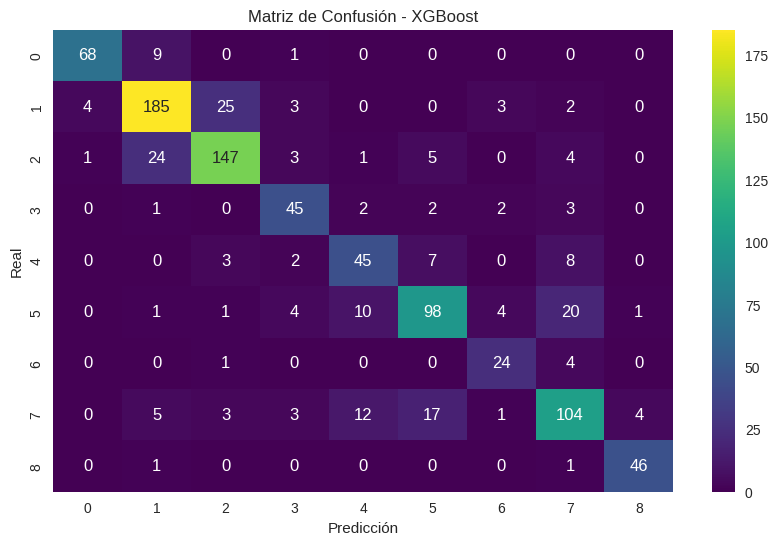

In [ ]:
y_pred = xgb_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Reporte de clasificación - XGBoost")
print(classification_report(y_test_adj, y_pred))  # <= aquí estaba el problema

# Matriz de confusión
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test_adj, y_pred), annot=True, fmt='d', cmap='viridis')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - XGBoost")
plt.show()


### Análisis del reporte de clasificación - XGBoost


* accuracy = 0.79 ;	Muy buena precisión general para un problema con 9 clases.

* macro avg = 0.78–0.80	; El modelo trata bien a todas las clases por igual, sin sesgos graves

* weighted avg = 0.79 ;	Coincide con accuracy, lo que indica balance entre clases grandes y pequeñas

Para las clases 1, 2, 3 y 9 el el f1 score es bastante alto, así mismo como las otras métricas, aprendió muy bien estas clases considerando que las clases 1, 2 y 3 son altamente pobladas, pero la 9 es una clase muy vacía

# Randon Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


Entrenar el modelo

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # opcional si hay desbalance residual
)

rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(class_weight='balanced', random_state=42)

Predecir

In [ ]:
y_pred_rf = rf_model.predict(X_test)


Evaluar

Reporte de clasificación - Random Forest
              precision    recall  f1-score   support

           1       0.86      0.82      0.84        78
           2       0.83      0.82      0.82       222
           3       0.79      0.79      0.79       185
           4       0.73      0.84      0.78        55
           5       0.68      0.74      0.71        65
           6       0.75      0.67      0.71       139
           7       0.64      0.86      0.74        29
           8       0.70      0.69      0.69       149
           9       0.94      0.96      0.95        48

    accuracy                           0.78       970
   macro avg       0.77      0.80      0.78       970
weighted avg       0.78      0.78      0.78       970



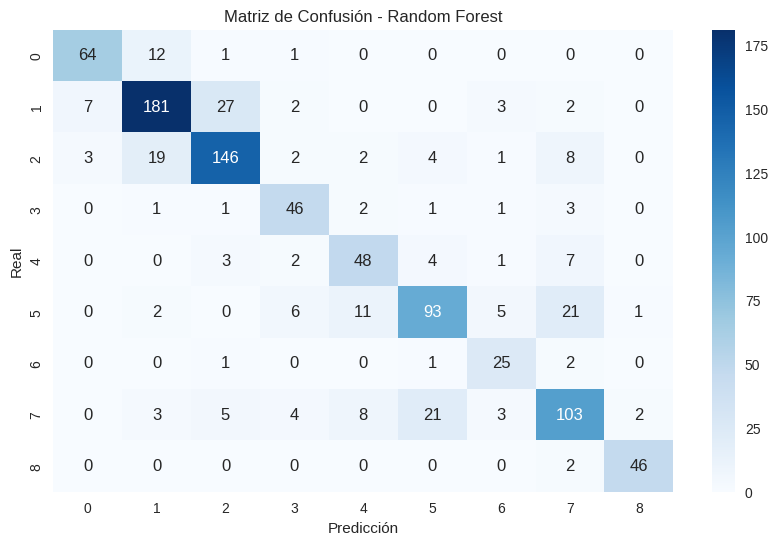

In [ ]:
print("Reporte de clasificación - Random Forest")
print(classification_report(y_test, y_pred_rf))

# Matriz de confusión
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Random Forest")
plt.show()


Se puede observar que el modelo es sólido para un modelo multiclase, hay buen equilibrio entre todas las clases y no hay un sesgo muy grande hacia las clases más grandes.

| Facies  | F1-score  | Comentario                                                                                   |
| ------- | --------- | -------------------------------------------------------------------------------------------- |
| **1–3** | 0.79–0.84 | Muy buen rendimiento, incluso ligeramente mejor que XGBoost en facies 3                      |
| **4–5** | 0.71–0.78 | Bastante bueno para clases difíciles; la facies 4 tiene **mejor recall** aquí que en XGBoost |
| **6–8** | 0.69–0.74 | Estables, pero ligeramente inferiores en precisión que en XGBoost                            |
| **9**   | **0.95**  | Nuevamente sobresaliente. Esta clase se predice con muchísima precisión                      |


# Conclusión final

### Conclusión comparativa de modelos

Tras entrenar y evaluar los modelos KNN, Random Forest y XGBoost para la clasificación de facies, se observa que **XGBoost ofrece el mejor rendimiento global**, con una precisión (`accuracy`) del **79%** y altos valores de `f1-score` en clases tanto frecuentes como minoritarias, destacando en la clase 9 (f1 = 0.93) y manteniendo buen equilibrio en el resto. **Random Forest** sigue de cerca con un `accuracy` del **78%**, mostrando un excelente comportamiento en clases difíciles como la 4 y 7, y además permite interpretar fácilmente la importancia de variables. Finalmente, **KNN** alcanza un `accuracy` del **76%**, siendo simple de implementar y con resultados razonables, aunque más sensibles al solapamiento entre clases. Por tanto, se concluye que **XGBoost es el modelo más robusto y eficiente para este conjunto de datos**, mientras que Random Forest es una gran alternativa si se prioriza interpretabilidad.


### Conclusión personal

Me pareció interesante la forma en que llevé acabo la investigación, se que hay mucho hecho con IA y la verdad, la IA me ayudo mucho a entender muchas cosas, pero cada vez me siento más suelto al entender las gráficas, las métricas y las distribuciones, se que un par de trabajos más adelante voy a entender mejor el ML y la estructura que sigue, la verdad, todo se puede automatizar demasiado, son **detalles** lo que importa.